In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Define the file path for the dataset
file_path = r'/content/heart.csv'

# Load the CSV file into a pandas DataFrame
df = pd.read_csv(file_path)

# Display the first few rows of the dataset to verify successful loading
print(df.head())

   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  


In [4]:
# Display basic information about the dataset, including column names, data types and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [5]:
# Check for missing (NaN) values in each column and display the count
missing_values = df.isna().sum()

# Print the missing values summary
print("Missing Values in Each Column:\n", missing_values)

Missing Values in Each Column:
 Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


In [6]:
# Generate and display summary statistics for numerical columns
summary_statistics = df.describe()

# Print the summary statistics
print("Statistical Summary of Numerical Features:\n", summary_statistics)

Statistical Summary of Numerical Features:
               Age   RestingBP  Cholesterol   FastingBS       MaxHR  \
count  918.000000  918.000000   918.000000  918.000000  918.000000   
mean    53.510893  132.396514   198.799564    0.233115  136.809368   
std      9.432617   18.514154   109.384145    0.423046   25.460334   
min     28.000000    0.000000     0.000000    0.000000   60.000000   
25%     47.000000  120.000000   173.250000    0.000000  120.000000   
50%     54.000000  130.000000   223.000000    0.000000  138.000000   
75%     60.000000  140.000000   267.000000    0.000000  156.000000   
max     77.000000  200.000000   603.000000    1.000000  202.000000   

          Oldpeak  HeartDisease  
count  918.000000    918.000000  
mean     0.887364      0.553377  
std      1.066570      0.497414  
min     -2.600000      0.000000  
25%      0.000000      0.000000  
50%      0.600000      1.000000  
75%      1.500000      1.000000  
max      6.200000      1.000000  


In [7]:
# Generates summary statistics and transposes the output for better readability
df.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


In [8]:
 # Returns a tuple (rows, columns) indicating the dimensions of the DataFrame
df.shape

(918, 12)

In [9]:
# Generates summary statistics for the 'Age' column, including count, mean, min, max, and quartiles
df["Age"].describe()


,Age
count,918.000000
mean,53.510893
std,9.432617
min,28.000000
25%,47.000000
50%,54.000000
75%,60.000000
max,77.000000


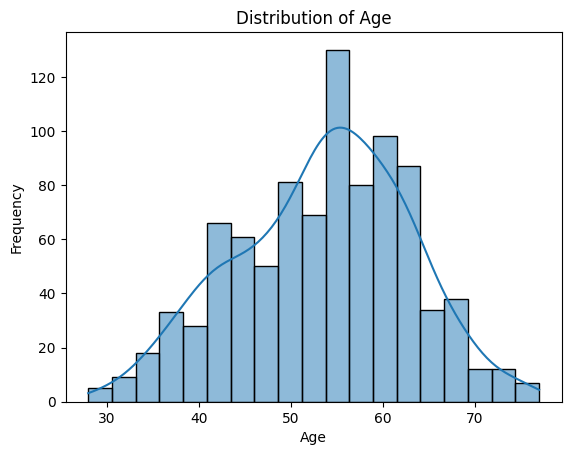

In [ ]:
# Create a histogram with a Kernel Density Estimate (KDE) for the 'Age' column
sns.histplot(df["Age"], kde=True)

# Set plot title and axis labels
plt.title('Distribution of Age')  # Title of the plot
plt.xlabel('Age')  # Label for the x-axis
plt.ylabel('Frequency')  # Label for the y-axis

# Display the plot
plt.show()

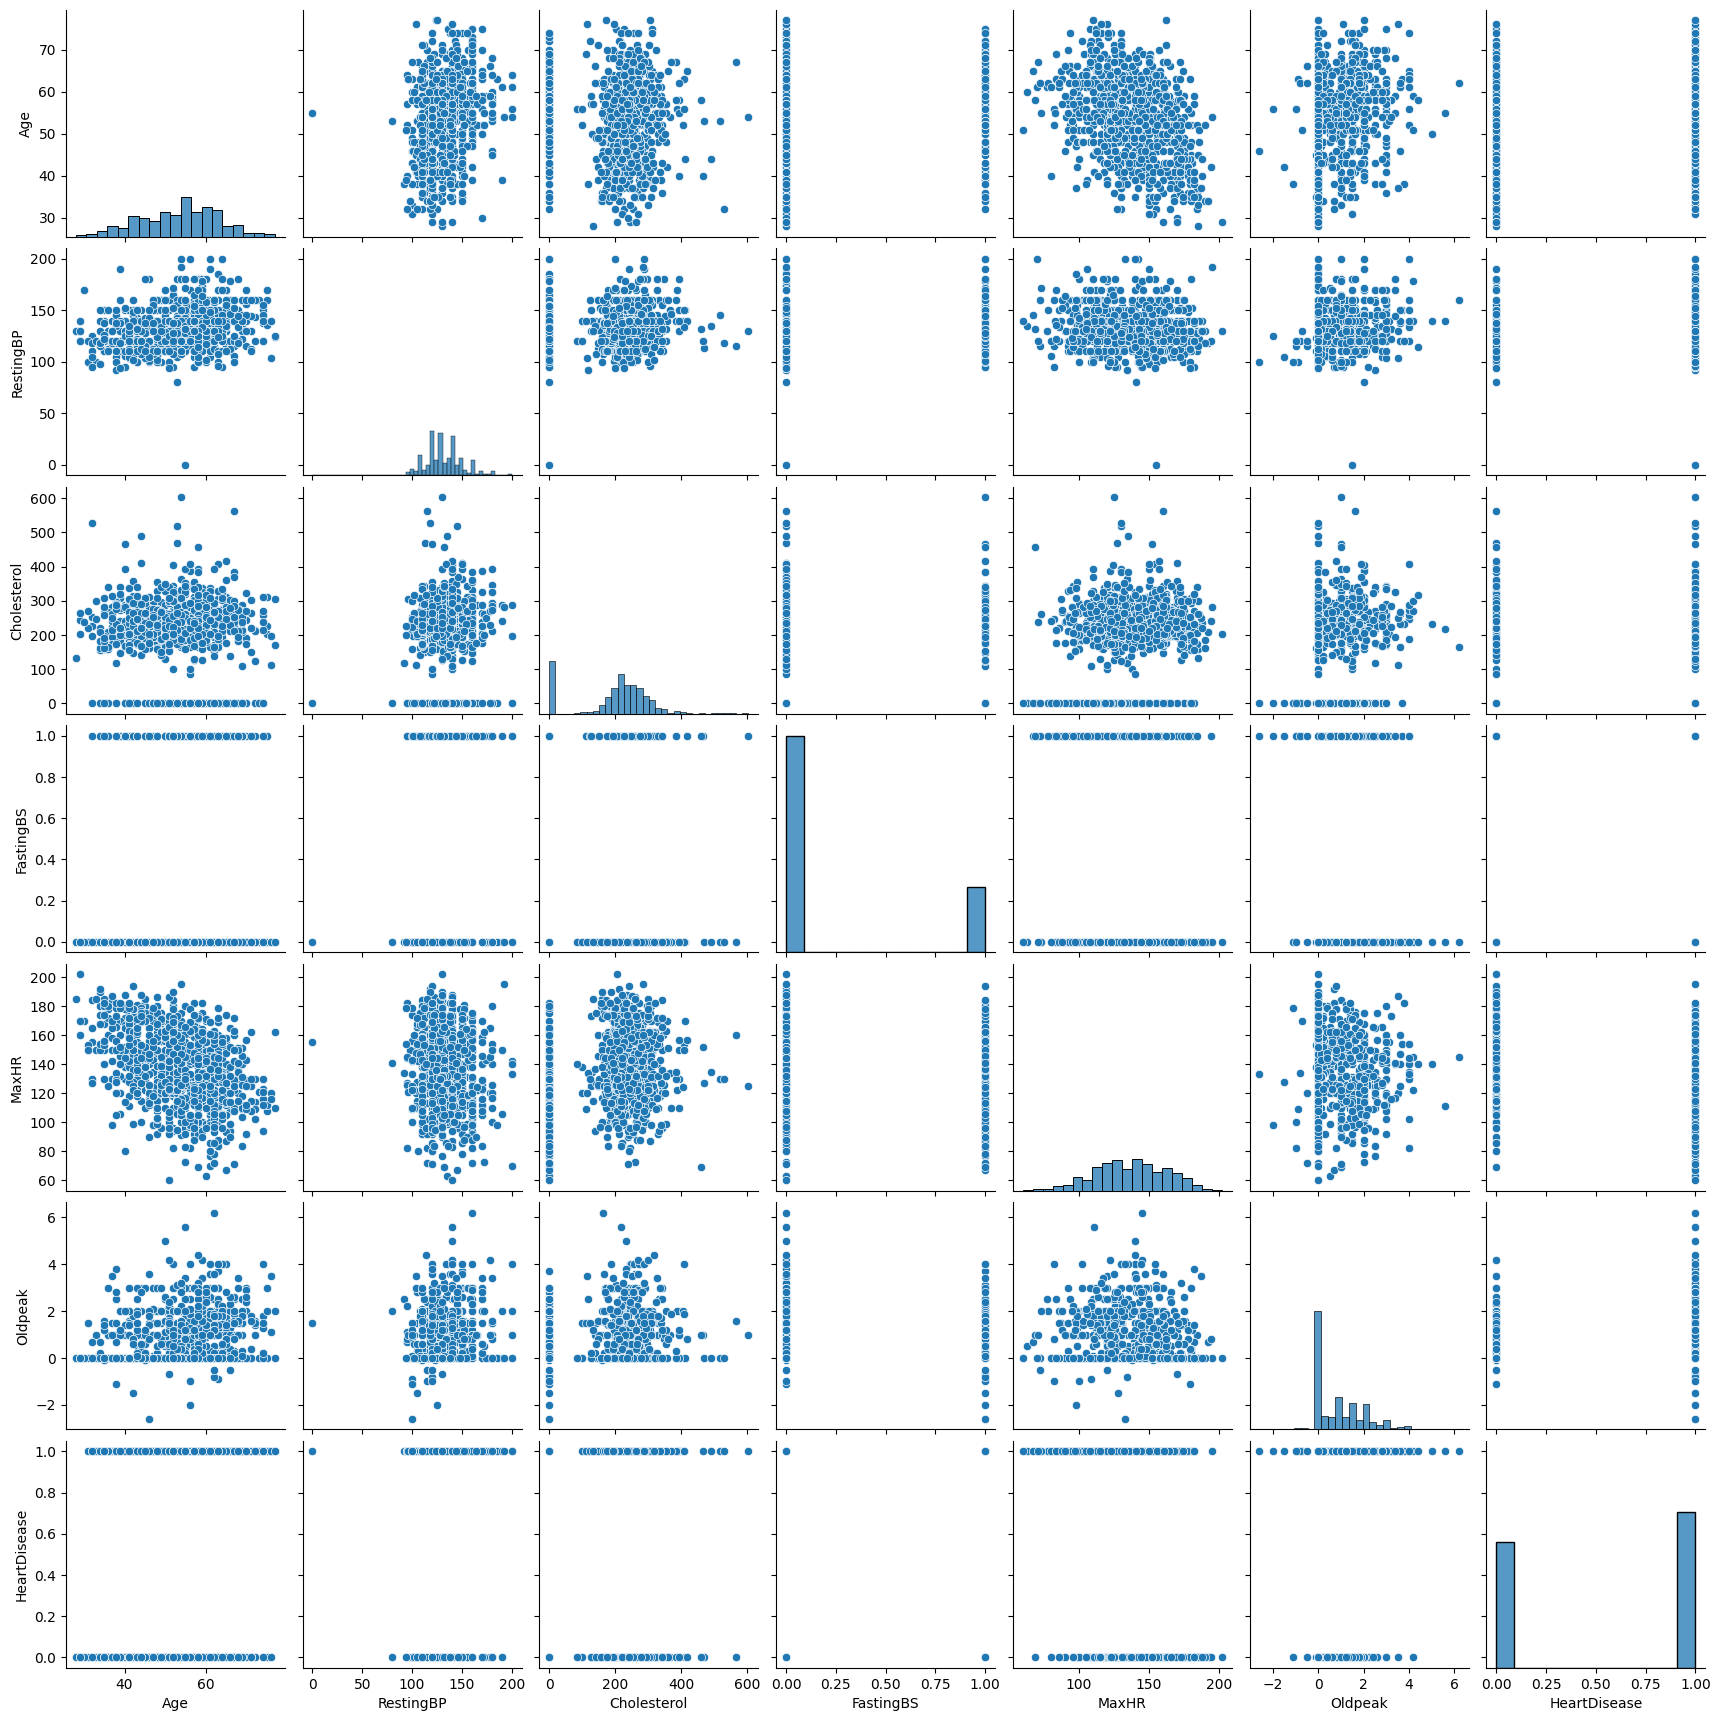

In [ ]:
sns.pairplot(df)
plt.show()

In [ ]:
import plotly.express as px  # Import Plotly Express for interactive visualizations

# Create a pie chart to visualize the distribution of 'Sex' in the dataset
fig = px.pie(df, names='Sex')

# Display the pie chart
fig.show()

Categorical Features: ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope']


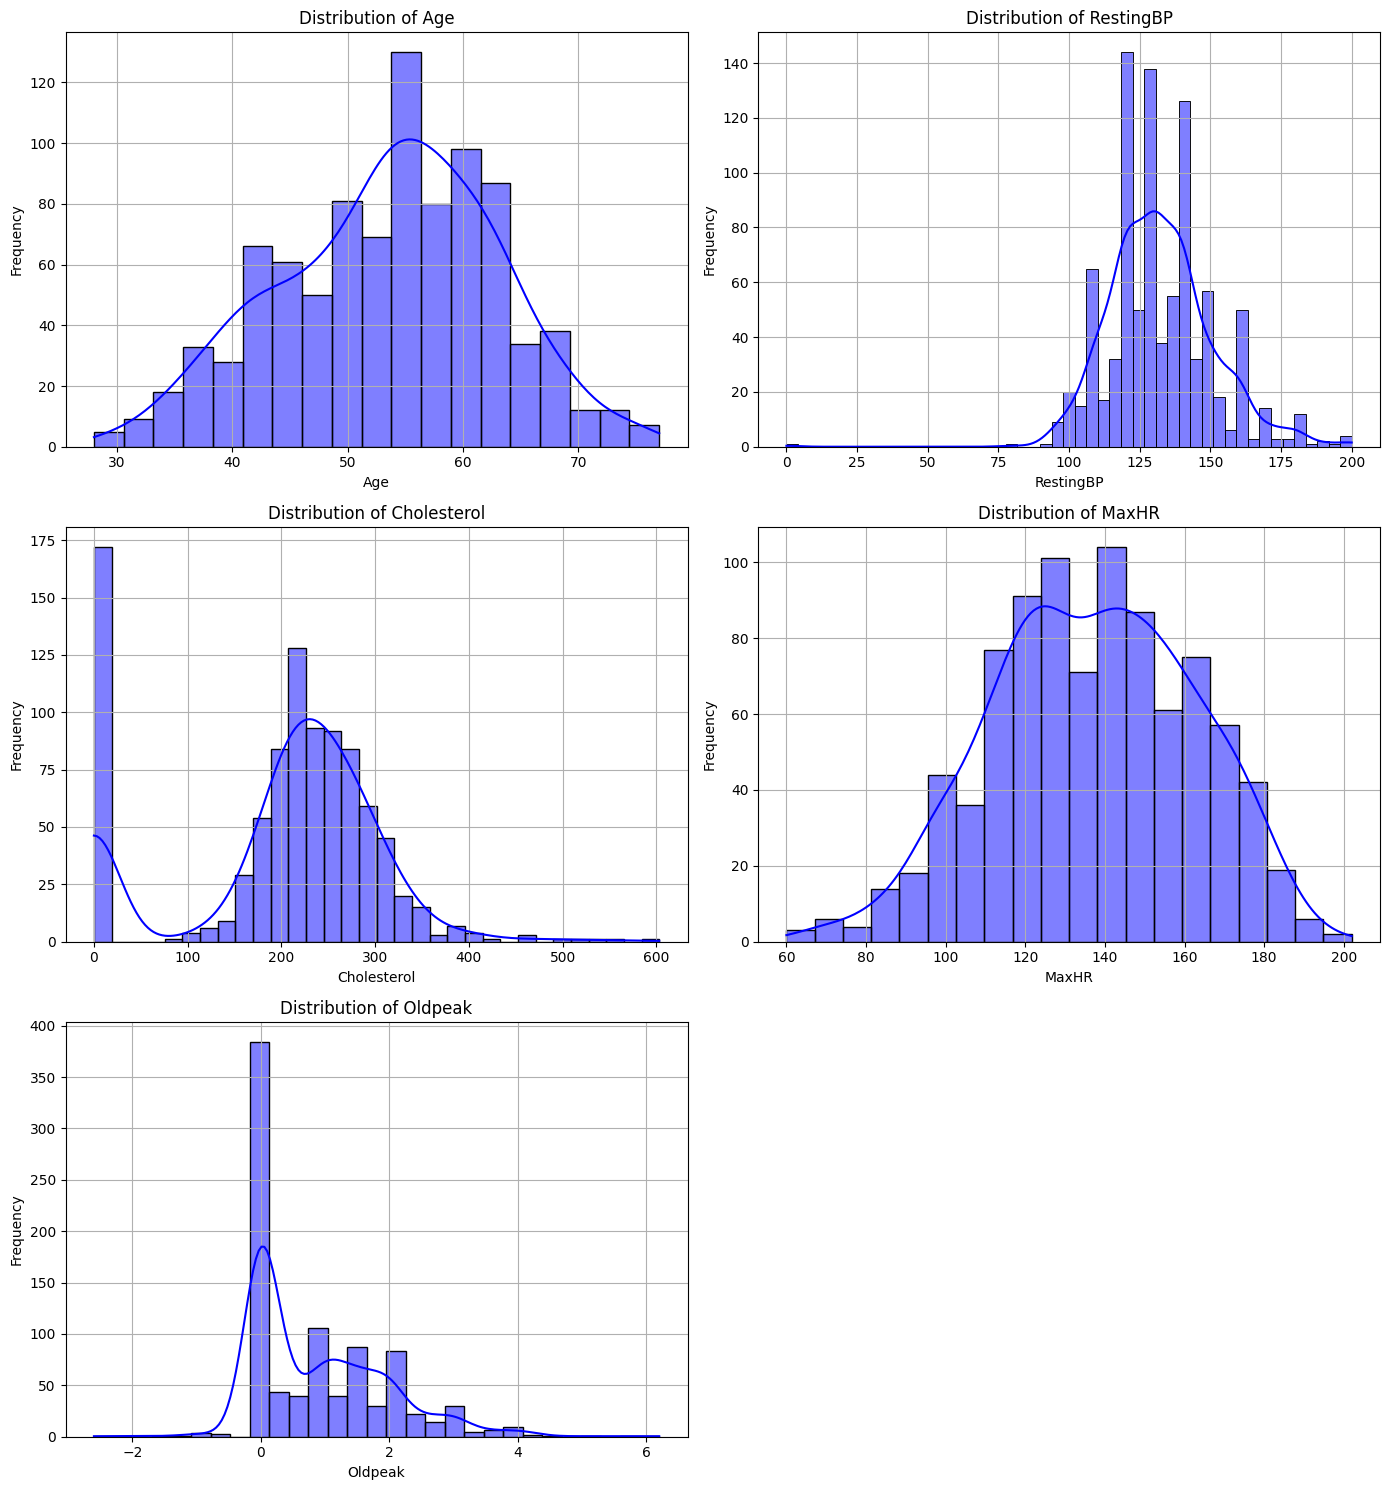

In [10]:

import math  # For mathematical operations

data = df.copy()  # Create a copy of the original dataset for analysis

def identify_features(data, categorical_threshold=5, target_col=None):
    """
    Identifies numerical and categorical features in a dataset.

    Parameters:
    - data : The dataset to analyze.
    - categorical_threshold (int): Maximum unique values allowed for a feature to be considered categorical.
    - target_col (str, optional): Column name of the target variable (if any).

    Returns:
    - dict: A dictionary containing lists of numerical and categorical features.
    """
    # Initialize feature lists
    categorical_features = []
    numerical_features = []

    # Identify feature types
    for feature in data.columns:
        unique_values = data[feature].nunique()
        feature_dtype = data[feature].dtype

        if feature_dtype not in ['int64', 'float64'] or unique_values <= categorical_threshold:
            if feature != target_col:  # Exclude target column from categorical list
                categorical_features.append(feature)
        else:
            numerical_features.append(feature)

    return {'numerical': numerical_features, 'categorical': categorical_features}

# Identify features in the dataset
features = identify_features(data, target_col='HeartDisease')
numerical_features = features['numerical']
categorical_features = features['categorical']

# Display identified categorical features
print("Categorical Features:", categorical_features)


def display_numerical_distributions(data, numerical_features):
    """
    Displays the distributions of numerical features in the dataset using histograms.

    Parameters:
    - data : The dataset containing numerical features.
    - numerical_features (list): List of numerical feature names.

    Returns:
    - None (Displays histograms for numerical features)
    """
    num_features = len(numerical_features)
    num_rows = math.ceil(num_features / 2)  # Arrange plots in rows with 2 plots per row

    fig, axes = plt.subplots(num_rows, 2, figsize=(14, 5 * num_rows))
    axes = axes.flatten()  # Flatten the axes array for easy indexing

    # Plot distributions
    for idx, feature in enumerate(numerical_features):
        sns.histplot(data[feature], kde=True, ax=axes[idx], color='blue')
        axes[idx].set_title(f'Distribution of {feature}', fontsize=12)
        axes[idx].set_xlabel(feature, fontsize=10)
        axes[idx].set_ylabel('Frequency', fontsize=10)
        axes[idx].grid(True)

    # Remove any unused subplots if the number of numerical features is odd
    for idx in range(len(numerical_features), len(axes)):
        fig.delaxes(axes[idx])

    plt.tight_layout()  # Adjust layout to prevent overlapping
    plt.show()

# Example usage: Visualize numerical feature distributions
display_numerical_distributions(data, numerical_features)


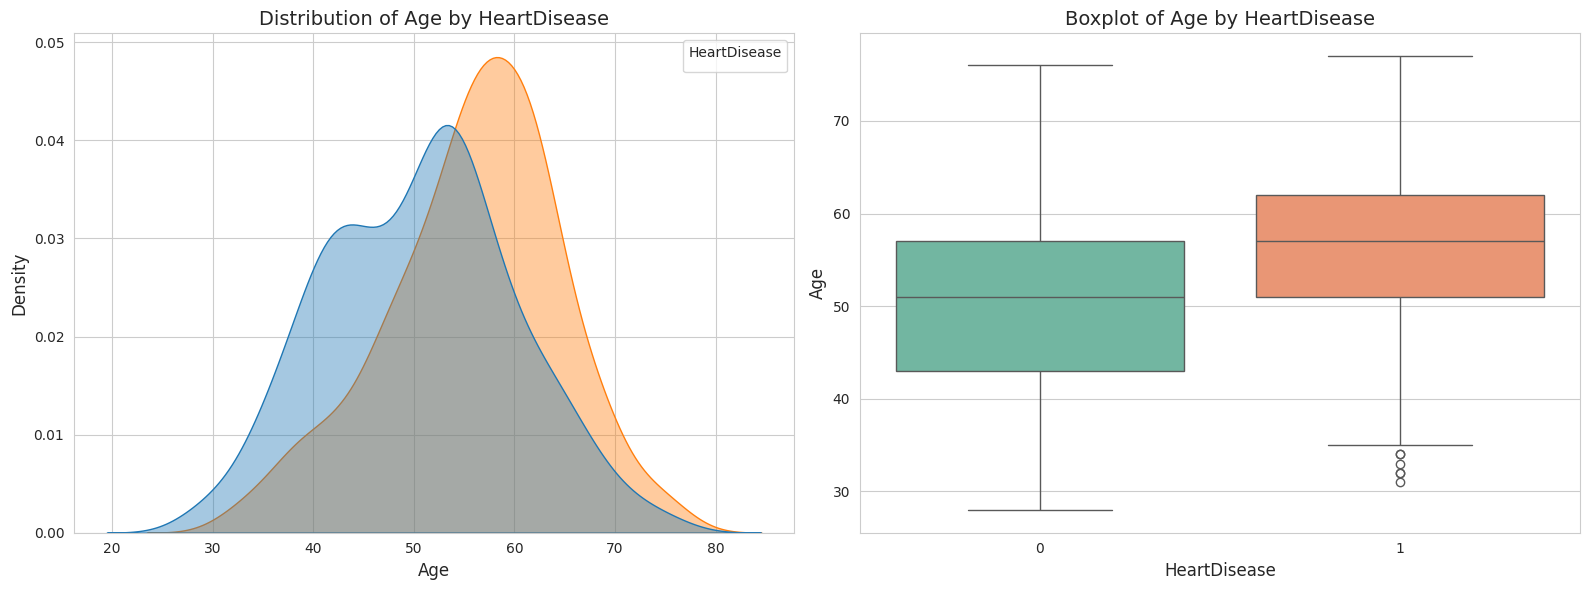

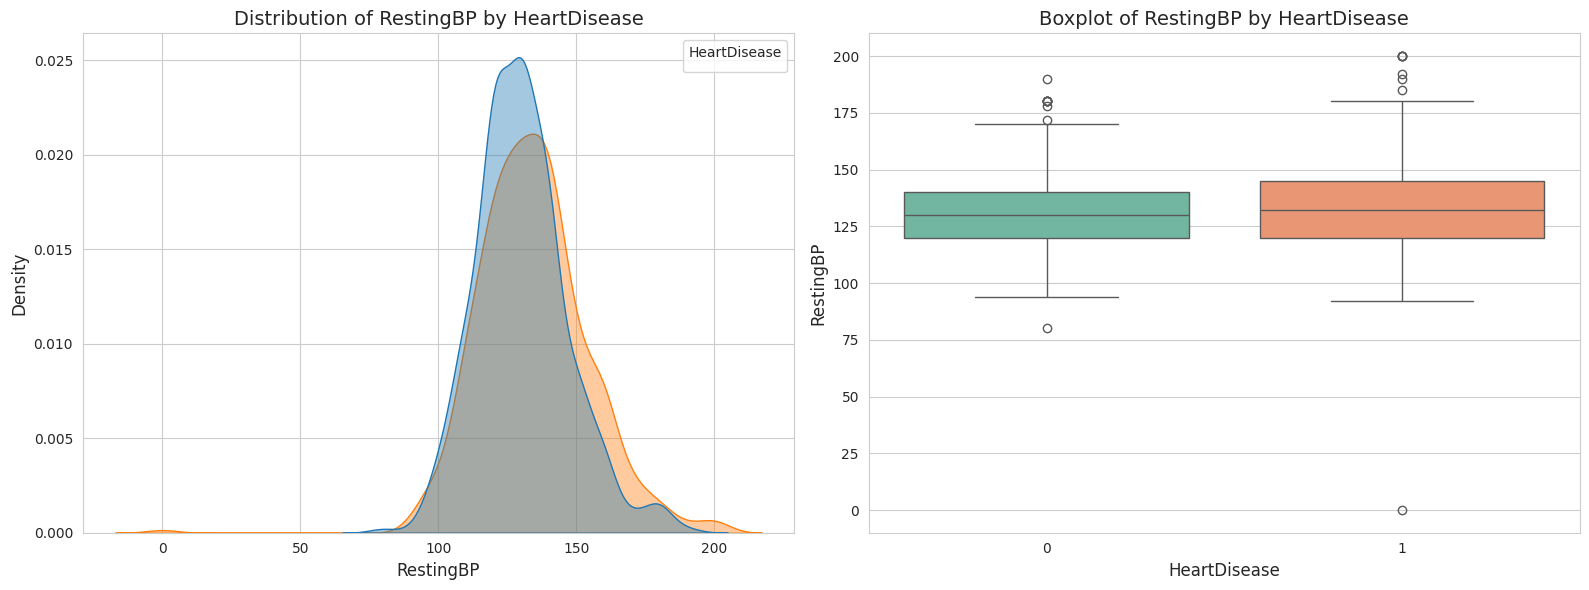

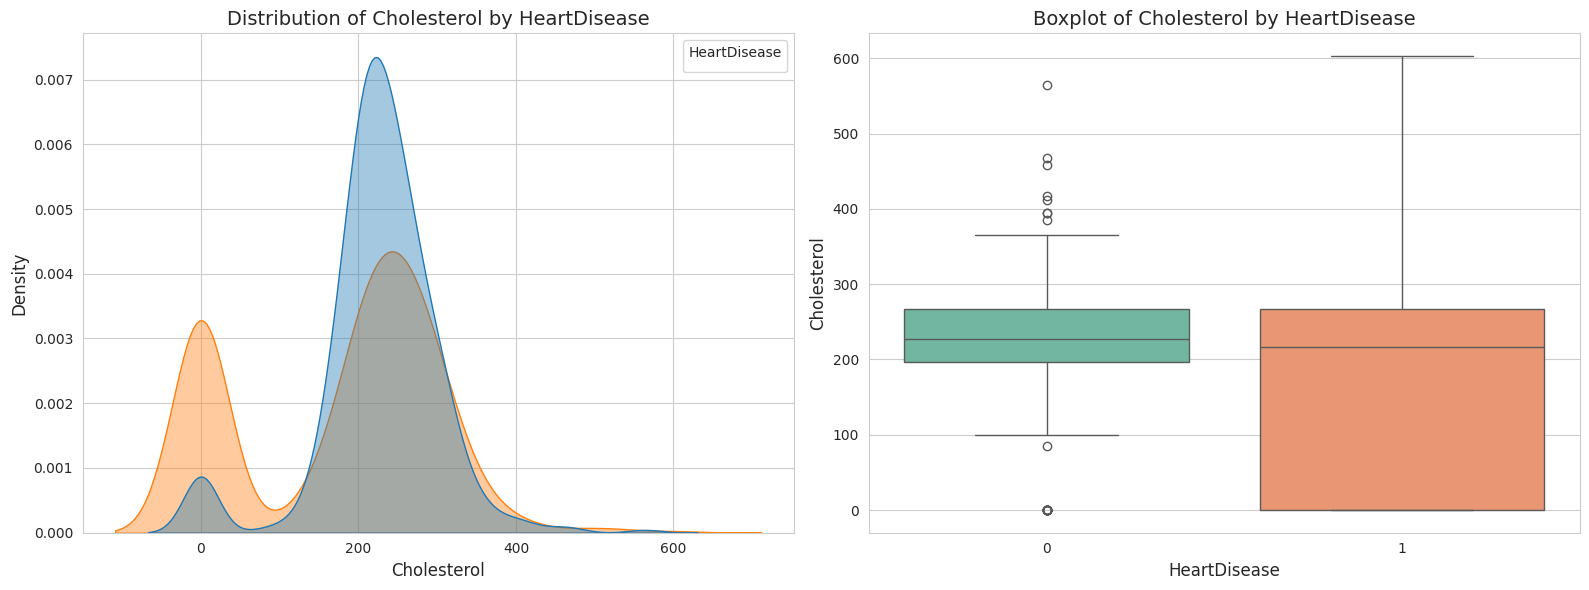

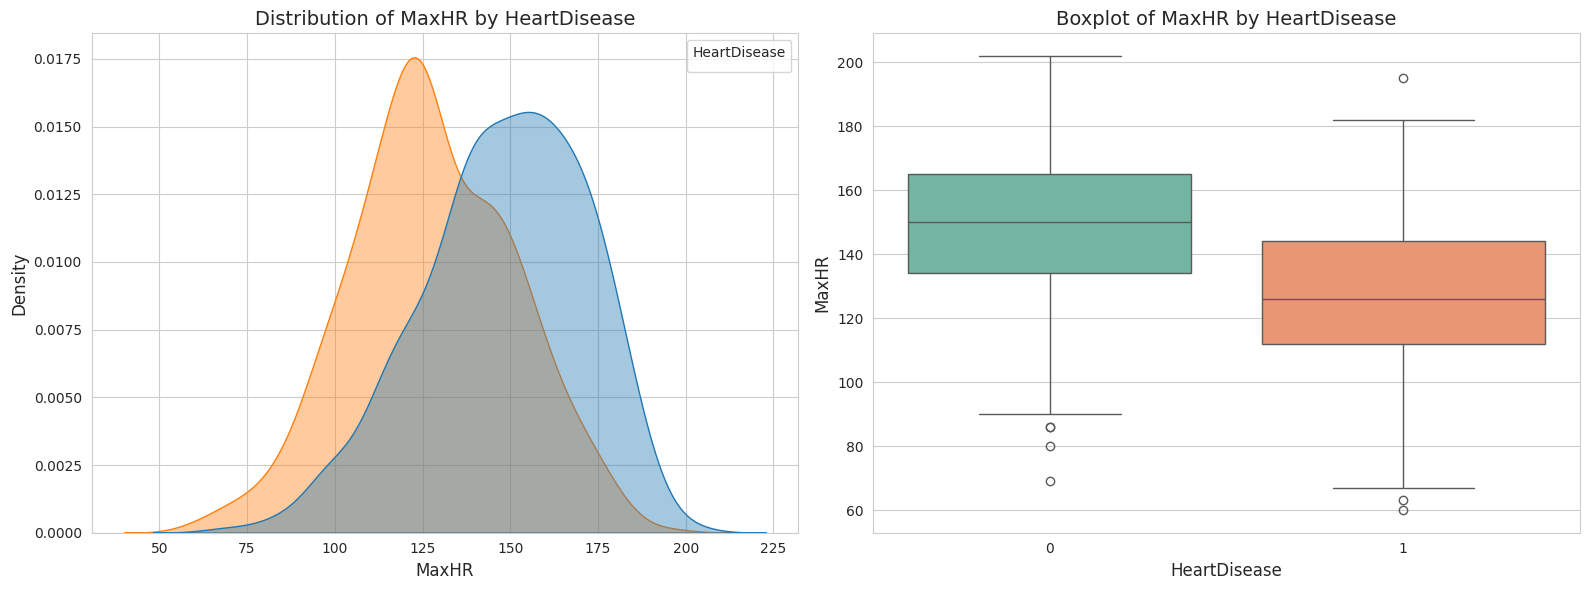

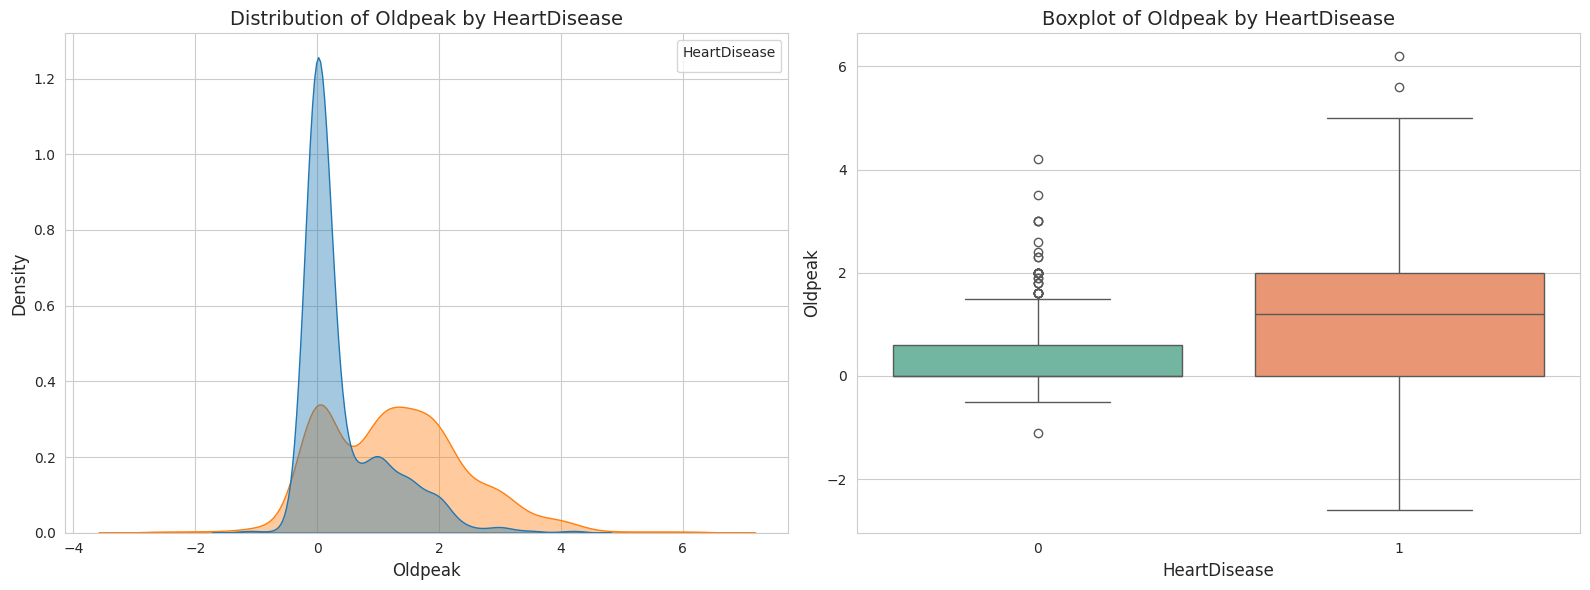

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

def explore_distributions_by_target(data, numerical_features, target_col='HeartDisease'):
    """
    Analyzes and visualizes the distributions of numerical features grouped by the target variable.

    Parameters:
    - data : The dataset.
    - numerical_features (list): List of numerical feature names.
    - target_col (str): The target column name.

    Returns:
    - None (Displays KDE and boxplots for each numerical feature grouped by the target variable).
    """

    # Set a consistent style for better visualization
    sns.set_style("whitegrid")

    # Iterate through all numerical features
    for feature in numerical_features:
        fig, axes = plt.subplots(1, 2, figsize=(16, 6))  # Create side-by-side subplots

        # KDE Plot (Kernel Density Estimation) - Distribution by Target
        sns.kdeplot(
            data=data, x=feature, hue=target_col, fill=True,
            alpha=0.4, common_norm=False, ax=axes[0]
        )
        axes[0].set_title(f'Distribution of {feature} by {target_col}', fontsize=14)
        axes[0].set_xlabel(feature, fontsize=12)
        axes[0].set_ylabel('Density', fontsize=12)
        axes[0].legend(title=target_col)

        # Boxplot - Visualizing Spread by Target
        sns.boxplot(
            data=data, x=target_col, y=feature, palette="Set2", ax=axes[1]
        )
        axes[1].set_title(f'Boxplot of {feature} by {target_col}', fontsize=14)
        axes[1].set_xlabel(target_col, fontsize=12)
        axes[1].set_ylabel(feature, fontsize=12)

        # Adjust layout and display plots
        plt.tight_layout()
        plt.show()

# Visualizing numerical feature distributions by target class
explore_distributions_by_target(
    data=data,
    numerical_features=numerical_features,
    target_col='HeartDisease',
)


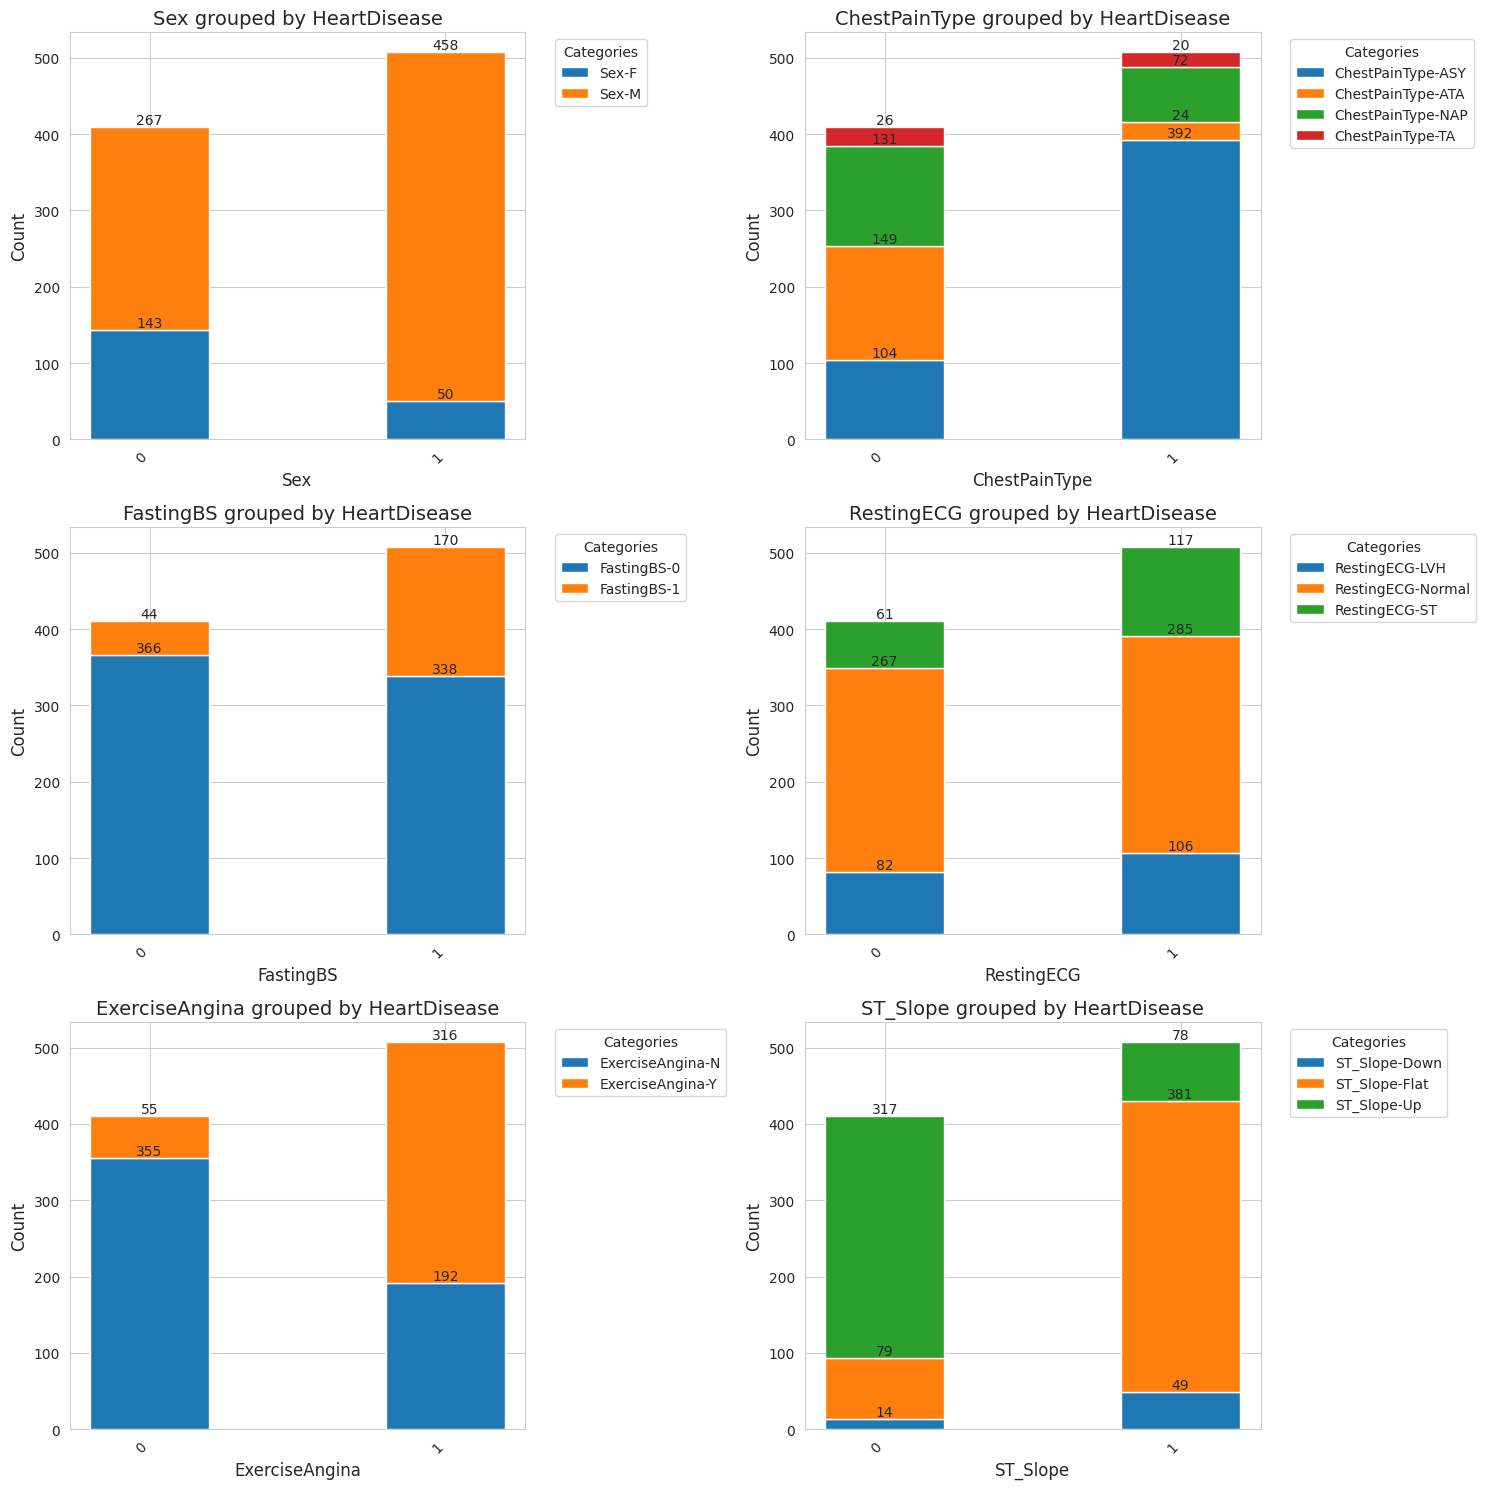

In [12]:


def display_categorical_distributions(data, categorical_features, target=None):
    """
    Visualizes the distributions of categorical features, optionally grouped by a target variable.

    Parameters:
    - data : The dataset containing categorical features.
    - categorical_features (list): List of categorical feature names.
    - target (str, optional): Target variable name for grouping (default: None).

    Returns:
    - None (Displays bar plots for categorical features, with stacking if target variable is provided).
    """

    # Determine number of rows and columns for subplots
    n_features = len(categorical_features)
    n_cols = 2  # Set the number of columns in the grid layout
    n_rows = math.ceil(n_features / n_cols)  # Calculate required rows

    # Create a figure with subplots for each categorical feature
    fig, axs = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
    axs = axs.flatten()  # Flatten axes array for easy iteration

    for i, feature in enumerate(categorical_features):
        ax = axs[i]  # Select current subplot axis

        if target:  # If target variable is provided, visualize grouped distributions
            # Count occurrences of each category within target groups
            counts = data.groupby(target)[feature].value_counts().unstack(fill_value=0)
            value_types = counts.columns  # Unique categories of the feature
            x = np.arange(len(counts.index))  # X-axis positions

            # Initialize bottom array for stacked bars
            bottom = np.zeros(len(counts.index))

            for value in value_types:
                bars = ax.bar(
                    x, counts[value], label=f"{feature}-{value}",
                    bottom=bottom, width=0.4  # Stacked bars
                )
                bottom += counts[value]  # Update stacking base

                # Add numerical labels on bars
                for idx, rect in enumerate(bars):
                    height = rect.get_height()
                    if height > 0:
                        ax.text(
                            rect.get_x() + rect.get_width() / 2, rect.get_y() + height,
                            f"{int(height)}", ha="center", va="bottom", fontsize=10
                        )

            # Set title and labels for grouped visualization
            ax.set_title(f"{feature} grouped by {target}", fontsize=14)
            ax.set_xticks(x)
            ax.set_xticklabels(counts.index, rotation=45, ha="right")
            ax.legend(title="Categories", bbox_to_anchor=(1.05, 1), loc="upper left")

        else:  # If no target variable, display simple count bar chart
            counts = data[feature].value_counts()
            ax.bar(counts.index, counts.values, color="skyblue")

            # Set title and labels for standard distribution plot
            ax.set_title(f"Distribution of {feature}", fontsize=14)
            ax.set_xticks(np.arange(len(counts.index)))
            ax.set_xticklabels(counts.index, rotation=45, ha="right")

            # Add numerical labels on bars
            for idx, value in enumerate(counts.values):
                ax.text(idx, value, f"{value}", ha="center", va="bottom", fontsize=10)

        ax.set_xlabel(feature, fontsize=12)
        ax.set_ylabel("Count", fontsize=12)

    # Remove any empty subplots in case of an odd number of features
    for j in range(n_features, len(axs)):
        fig.delaxes(axs[j])

    # Adjust layout for better visualization
    plt.tight_layout()
    #plt.suptitle("Categorical Feature Distributions", fontsize=16)
    plt.show()

#Display categorical distributions with target variable 'HeartDisease'
display_categorical_distributions(data, categorical_features, target='HeartDisease')


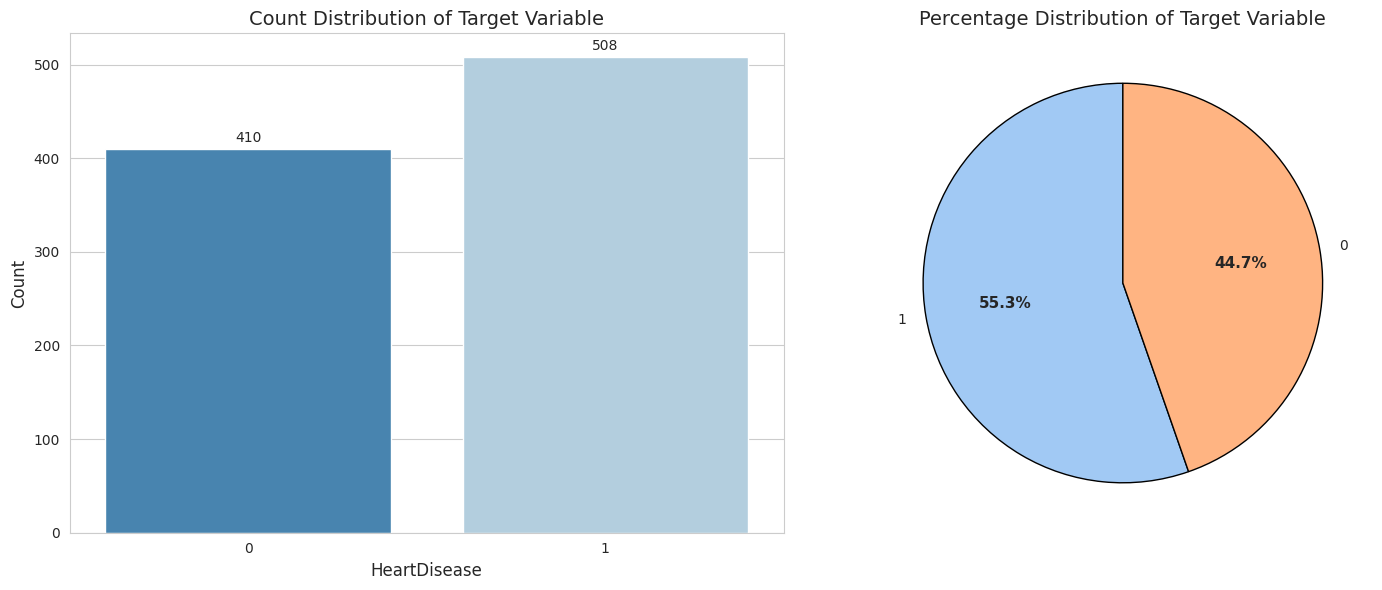

In [13]:
def analyze_target_distribution(data, target_column):
    """
    Analyzes and visualizes the distribution of the target variable using both
    a count plot and a pie chart.

    Parameters:
    - data : The dataset containing the target column.
    - target_column (str): The name of the target variable.

    Returns:
    - None (Displays the count plot and pie chart for target distribution).
    """

    # Calculate distribution counts and percentages
    class_distribution = data[target_column].value_counts()  # Raw counts
    class_distribution_pct = data[target_column].value_counts(normalize=True) * 100  # Percentage

    # Create a figure with two subplots: Count Plot & Pie Chart
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))

    ## 1️⃣ Count Plot - Shows the number of occurrences for each class ##
    sns.countplot(data=data, x=target_column, ax=axes[0], palette="Blues_r")

    # Formatting the count plot
    axes[0].set_title('Count Distribution of Target Variable', fontsize=14)
    axes[0].set_xlabel(target_column, fontsize=12)
    axes[0].set_ylabel('Count', fontsize=12)

    # Add value labels to bars
    for container in axes[0].containers:
        axes[0].bar_label(container, fmt='%d', fontsize=10, padding=3)

    ## 2️⃣ Pie Chart - Shows percentage distribution ##
    labels = class_distribution.index.astype(str)  # Convert class labels to string
    colors_pie = sns.color_palette('pastel')[:len(class_distribution)]  # Dynamic color selection
    wedges, texts, autotexts = axes[1].pie(
        class_distribution_pct, labels=labels, colors=colors_pie, autopct='%1.1f%%',
        startangle=90, wedgeprops={'edgecolor': 'black'}
    )

    # Formatting the pie chart
    axes[1].set_title('Percentage Distribution of Target Variable', fontsize=14)

    # Improve visibility of percentage labels
    for text in autotexts:
        text.set_fontsize(11)
        text.set_weight('bold')

    # Adjust layout for better visualization
    plt.tight_layout()
    plt.show()

# Analyze the target variable 'HeartDisease'
analyze_target_distribution(data, 'HeartDisease')

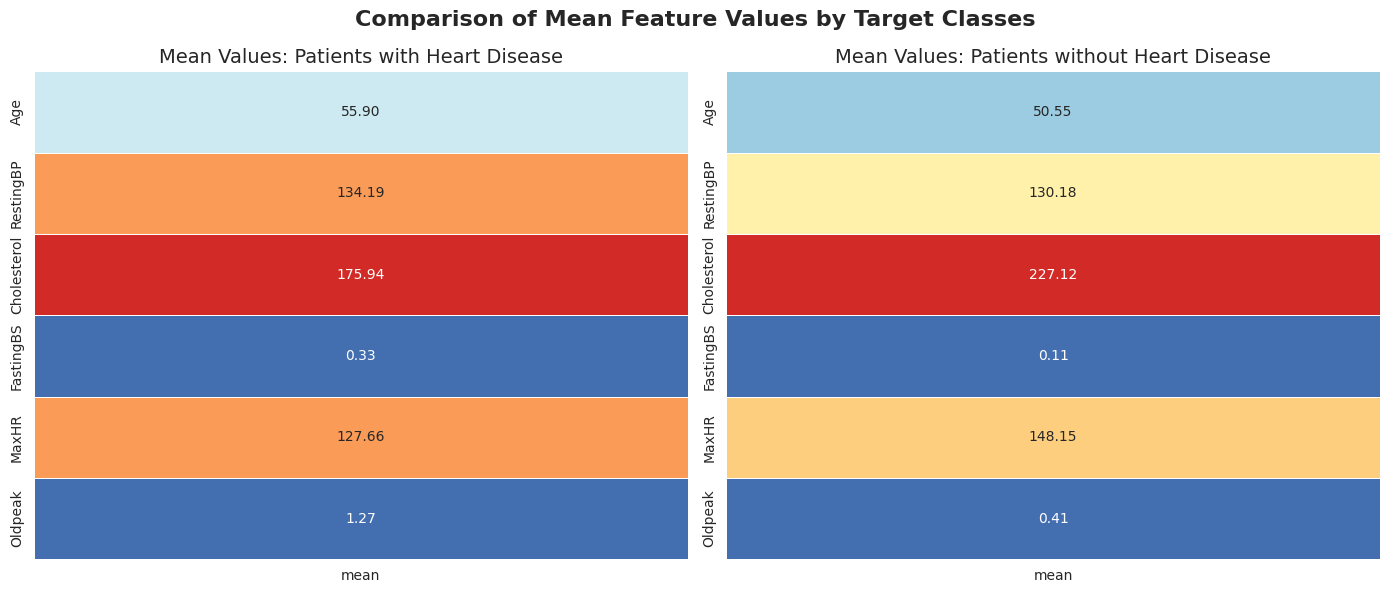

In [14]:
def analyze_classes(data, target_column):
    """
    Analyzes and visualizes the statistical differences between classes in the target variable.

    Parameters:
    - data: The dataset containing the target variable.
    - target_column (str): The name of the target variable.

    Returns:
    - None (Displays heatmaps comparing mean values of numerical features for each class).
    """

    # Compute descriptive statistics for each target class (excluding the target column)
    class_yes = data[data[target_column] == 1].drop(columns=[target_column]).describe().T
    class_no = data[data[target_column] == 0].drop(columns=[target_column]).describe().T

    # Define color palette for heatmaps
    colors = sns.color_palette("RdYlBu_r", n_colors=10)

    # Create a figure with two subplots for class comparisons
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

    ## 1️⃣ Heatmap for Patients with Heart Disease ##
    sns.heatmap(
        class_yes[['mean']], annot=True, cmap=colors, fmt='.2f',
        linewidths=0.5, ax=axes[0], cbar=False
    )
    axes[0].set_title('Mean Values: Patients with Heart Disease', fontsize=14)

    ## 2️⃣ Heatmap for Patients without Heart Disease ##
    sns.heatmap(
        class_no[['mean']], annot=True, cmap=colors, fmt='.2f',
        linewidths=0.5, ax=axes[1], cbar=False
    )
    axes[1].set_title('Mean Values: Patients without Heart Disease', fontsize=14)

    # Overall title for the visualization
    plt.suptitle('Comparison of Mean Feature Values by Target Classes', fontsize=16, fontweight='bold')

    # Adjust layout for better spacing
    plt.tight_layout()
    plt.show()

# Analyzing statistics for 'HeartDisease' classes
analyze_classes(data, 'HeartDisease')


In [15]:
numerical_features

['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

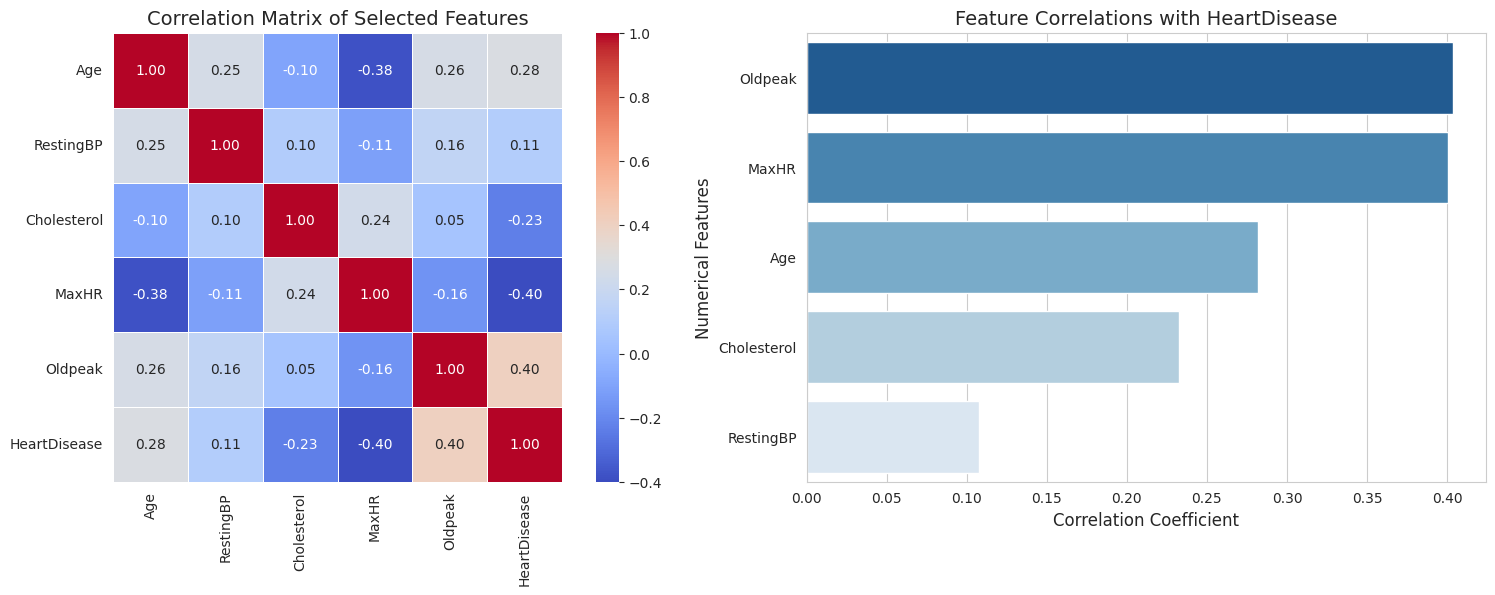

In [16]:
def analyze_numerical_correlations(data, target_column, numerical_features):
    """
    Analyzes and visualizes the correlation between selected numerical features and the target variable.

    Parameters:
    - data: The dataset containing numerical features.
    - target_column (str): The target variable.
    - numerical_features (list): List of numerical features to analyze.

    Returns:
    - None (Displays a heatmap and a bar plot of feature correlations with the target).
    """

    # Compute correlations only for selected numerical features
    correlation_matrix = data[numerical_features + [target_column]].corr()
    target_correlation = correlation_matrix[target_column].drop(target_column)  # Remove self-correlation

    # Sort correlations in descending order
    target_correlation_sorted = target_correlation.abs().sort_values(ascending=False)

    # Set up figure with two subplots
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))

    ## 1️⃣ Heatmap: Correlation Matrix of Selected Features ##
    sns.heatmap(
        correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5,
        square=True, ax=axes[0], cbar=True
    )
    axes[0].set_title("Correlation Matrix of Selected Features", fontsize=14)

    ## 2️⃣ Bar Plot: Correlation with Target ##
    sns.barplot(
        x=target_correlation_sorted.values, y=target_correlation_sorted.index,
        palette="Blues_r", ax=axes[1]
    )
    axes[1].set_title(f"Feature Correlations with {target_column}", fontsize=14)
    axes[1].set_xlabel("Correlation Coefficient", fontsize=12)
    axes[1].set_ylabel("Numerical Features", fontsize=12)

    # Display the plots
    plt.tight_layout()
    plt.show()

# Define selected numerical features
numerical_features = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

#Analyzing numerical feature correlations with 'HeartDisease'
analyze_numerical_correlations(data, 'HeartDisease', numerical_features)


In [17]:
# Select categorical columns based on their data type (object/string type)
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()  # Convert to a list for better usability

# Print the list of categorical column names
print("Categorical Columns in the Dataset:", categorical_cols)


Categorical Columns in the Dataset: ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']


In [18]:
from sklearn.preprocessing import LabelEncoder

def encode_categorical_features(df, ordinal_features=None):
    """
    Encodes categorical features into numerical format using:
    - Ordinal Encoding for ordered categories.
    - One-Hot Encoding for nominal categories.
    - Converts boolean (True/False) values into 1 and 0.

    Parameters:
    - df (pd.DataFrame): The dataset containing categorical features.
    - ordinal_features (dict, optional): Dictionary where keys are ordinal column names
      and values are lists defining category order.

    Returns:
    - df_encoded (pd.DataFrame): The transformed dataset with encoded categorical features.
    """

    # Identify categorical columns
    categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

    # Apply encoding based on category type
    for col in categorical_cols:
        if ordinal_features and col in ordinal_features:
            # Apply custom ordinal encoding for ordered categorical features
            category_order = ordinal_features[col]  # Get the correct order
            df[col] = df[col].map({category_order[i]: i for i in range(len(category_order))})
        else:
            # Apply One-Hot Encoding for nominal features
            df = pd.get_dummies(df, columns=[col], prefix=col, drop_first=True)

    # Convert boolean values (True/False) to integer (1/0)
    for col in df.select_dtypes(include=['bool']).columns:
        df[col] = df[col].astype(int)

    return df

# Define ordinal features and their correct order
ordinal_features = {
    'ST_Slope': ['Down', 'Flat', 'Up']  # Correct ordinal mapping
}

# Apply encoding
df_encoded = encode_categorical_features(df, ordinal_features)

# Display the transformed dataset
print("Transformed DataFrame with Encoded Features:")
print(df_encoded.head())


Transformed DataFrame with Encoded Features:
   Age  RestingBP  Cholesterol  FastingBS  MaxHR  Oldpeak  ST_Slope  \
0   40        140          289          0    172      0.0         2   
1   49        160          180          0    156      1.0         1   
2   37        130          283          0     98      0.0         2   
3   48        138          214          0    108      1.5         1   
4   54        150          195          0    122      0.0         2   

   HeartDisease  Sex_M  ChestPainType_ATA  ChestPainType_NAP  \
0             0      1                  1                  0   
1             1      0                  0                  1   
2             0      1                  1                  0   
3             1      0                  0                  0   
4             0      1                  0                  1   

   ChestPainType_TA  RestingECG_Normal  RestingECG_ST  ExerciseAngina_Y  
0                 0                  1              0                

In [19]:
df_encoded

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,ST_Slope,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y
0,40,140,289,0,172,0.0,2,0,1,1,0,0,1,0,0
1,49,160,180,0,156,1.0,1,1,0,0,1,0,1,0,0
2,37,130,283,0,98,0.0,2,0,1,1,0,0,0,1,0
3,48,138,214,0,108,1.5,1,1,0,0,0,0,1,0,1
4,54,150,195,0,122,0.0,2,0,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,1,1,1,0,0,1,1,0,0
914,68,144,193,1,141,3.4,1,1,1,0,0,0,1,0,0
915,57,130,131,0,115,1.2,1,1,1,0,0,0,1,0,1
916,57,130,236,0,174,0.0,1,1,0,1,0,0,0,0,0


In [20]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                918 non-null    int64  
 1   RestingBP          918 non-null    int64  
 2   Cholesterol        918 non-null    int64  
 3   FastingBS          918 non-null    int64  
 4   MaxHR              918 non-null    int64  
 5   Oldpeak            918 non-null    float64
 6   ST_Slope           918 non-null    int64  
 7   HeartDisease       918 non-null    int64  
 8   Sex_M              918 non-null    int64  
 9   ChestPainType_ATA  918 non-null    int64  
 10  ChestPainType_NAP  918 non-null    int64  
 11  ChestPainType_TA   918 non-null    int64  
 12  RestingECG_Normal  918 non-null    int64  
 13  RestingECG_ST      918 non-null    int64  
 14  ExerciseAngina_Y   918 non-null    int64  
dtypes: float64(1), int64(14)
memory usage: 107.7 KB


In [21]:
x=df_encoded.drop('HeartDisease',axis=1)
y=df_encoded['HeartDisease']

In [22]:
x.shape

(918, 14)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [24]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
X_train = scaler.fit_transform(X_train)

# Use the same scaler to transform the test data (without fitting again)
X_test = scaler.transform(X_test)

Initializing Logistic Regression Model...
Training Time (seconds): 0.0196s
Model Accuracy: 85.00%
Performing 10-Fold Cross-Validation...
K-Fold Cross-Validation Accuracy: 85.15%

Classification Report:

              precision    recall  f1-score   support

           0       0.79      0.87      0.83        77
           1       0.90      0.83      0.86       107

    accuracy                           0.85       184
   macro avg       0.84      0.85      0.85       184
weighted avg       0.85      0.85      0.85       184

Generating Confusion Matrix...


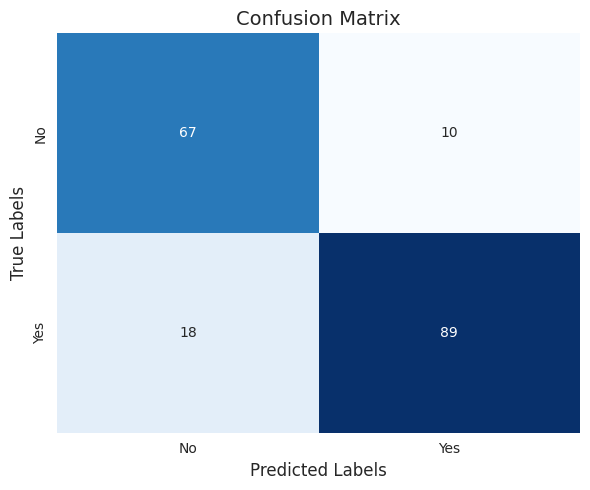

In [26]:
import time
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Step 1: Initialize and Train the Logistic Regression Model
print("Initializing Logistic Regression Model...")

# Create a Logistic Regression model instance
log_reg = LogisticRegression(max_iter=1000)

# Measure training time
start_time = time.time()
log_reg.fit(X_train, y_train)  # Train the model on training data
end_time = time.time()

# Display training time
print(f"Training Time (seconds): {round(end_time - start_time, 4)}s")

# Step 2: Model Predictions
y_pred = log_reg.predict(X_test)  # Generate predictions on test data

# Step 3: Evaluate Model Performance
accuracy = round(accuracy_score(y_test, y_pred), 2)  # Compute accuracy
print(f"Model Accuracy: {accuracy * 100:.2f}%")

# Step 4: Cross-Validation
print("Performing 10-Fold Cross-Validation...")

cv = KFold(n_splits=10, random_state=1, shuffle=True)  # Define K-Fold cross-validation
cv_scores = cross_val_score(log_reg, X_train, y_train, cv=cv)  # Compute scores

# Compute and display mean cross-validation accuracy
mean_cv_accuracy = np.mean(np.abs(cv_scores))
print(f"K-Fold Cross-Validation Accuracy: {mean_cv_accuracy * 100:.2f}%")

# Step 5: Detailed Classification Report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

# Step 6: Confusion Matrix Visualization
print("Generating Confusion Matrix...")

# Compute confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix using seaborn
plt.figure(figsize=(6, 5))
ax = sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)

# Set axis labels and titles
ax.set_xlabel("Predicted Labels", fontsize=12)
ax.set_ylabel("True Labels", fontsize=12)
ax.set_title("Confusion Matrix", fontsize=14)

# Define tick labels (assuming binary classification: No/Yes)
ax.xaxis.set_ticklabels(['No', 'Yes'])
ax.yaxis.set_ticklabels(['No', 'Yes'])

# Display plot
plt.tight_layout()
plt.show()


In [27]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, BatchNormalization
from sklearn.preprocessing import StandardScaler
import numpy as np

# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshaping the data for CNN input
X_train_cnn = np.expand_dims(X_train_scaled, axis=2)
X_test_cnn = np.expand_dims(X_test_scaled, axis=2)

# Building the CNN model
model = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train_cnn.shape[1], 1)),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),

    Conv1D(filters=128, kernel_size=3, activation='relu'),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')  # Binary classification
])

# Compiling the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Training the model
epochs = 50
batch_size = 32
history = model.fit(X_train_cnn, y_train, validation_data=(X_test_cnn, y_test), epochs=epochs, batch_size=batch_size, verbose=1)

# Evaluating the model
loss, accuracy = model.evaluate(X_test_cnn, y_test)
print(f'Test Accuracy: {accuracy * 100:.2f}%')


Epoch 1/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.6807 - loss: 0.6629 - val_accuracy: 0.8207 - val_loss: 0.6171
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8179 - loss: 0.4243 - val_accuracy: 0.8750 - val_loss: 0.5907
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8671 - loss: 0.3443 - val_accuracy: 0.8804 - val_loss: 0.5575
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8329 - loss: 0.3814 - val_accuracy: 0.8750 - val_loss: 0.5232
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8849 - loss: 0.3096 - val_accuracy: 0.8587 - val_loss: 0.5003
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8552 - loss: 0.3231 - val_accuracy: 0.8804 - val_loss: 0.4817
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8757 - loss: 0.2833 - val_accuracy: 0.8804 - val_loss: 0.4579
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8742 - loss: 0.2709 - val_accuracy: 0.8859 - v

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


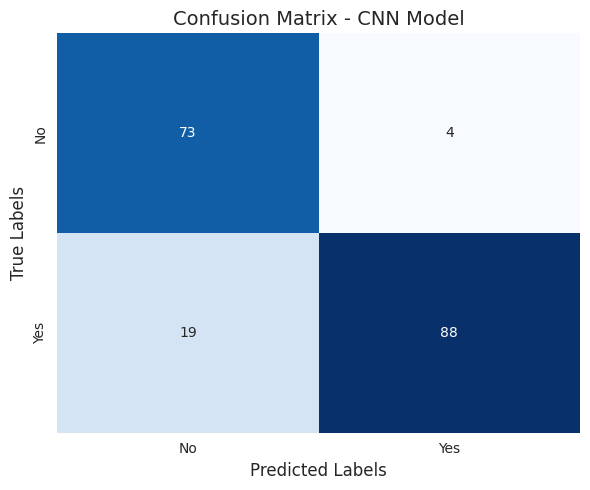


Classification Report:

              precision    recall  f1-score   support

           0       0.79      0.95      0.86        77
           1       0.96      0.82      0.88       107

    accuracy                           0.88       184
   macro avg       0.88      0.89      0.87       184
weighted avg       0.89      0.88      0.88       184



In [28]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Step 1: Generate Predictions
y_pred_prob = model.predict(X_test_cnn)  # Get predicted probabilities
y_pred = (y_pred_prob > 0.5).astype(int)  # Convert probabilities to binary labels (0 or 1)

# Step 2: Compute Confusion Matrix
cf_matrix = confusion_matrix(y_test, y_pred)

# Step 3: Plot Confusion Matrix
plt.figure(figsize=(6, 5))
ax = sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)

# Set axis labels and titles
ax.set_xlabel("Predicted Labels", fontsize=12)
ax.set_ylabel("True Labels", fontsize=12)
ax.set_title("Confusion Matrix - CNN Model", fontsize=14)

# Define tick labels (assuming binary classification: 0 = No, 1 = Yes)
ax.xaxis.set_ticklabels(['No', 'Yes'])
ax.yaxis.set_ticklabels(['No', 'Yes'])

# Display plot
plt.tight_layout()
plt.show()

# Step 4: Print Classification Report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


In [29]:
!pip install lime shap


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 7.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=89e6140cf09f28e6b50cd6a35e855abd4c06fa830625cedbf649ed3d26d8b549
  Stored in directory: /root/.cache/pip/wheels/85/fa/a3/9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime


In [34]:
# Select categorical columns based on their data type (object/string type)
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()  # Convert to a list for better usability

# Print the list of categorical column names
print("Categorical Columns in the Dataset:", categorical_cols)

# Define feature_names here (replace your existing categorical_cols definition if necessary)
feature_names = df_encoded.drop(columns=['HeartDisease']).columns.tolist()  # Features for explanations

print(len(feature_names), X_test_scaled.shape[1])

Categorical Columns in the Dataset: ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
14 14


In [35]:
print(df_encoded.shape)           # Should return (rows, 14)
print(df_encoded.columns.tolist())  # This will show all actual column names

(918, 15)
['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak', 'ST_Slope', 'HeartDisease', 'Sex_M', 'ChestPainType_ATA', 'ChestPainType_NAP', 'ChestPainType_TA', 'RestingECG_Normal', 'RestingECG_ST', 'ExerciseAngina_Y']


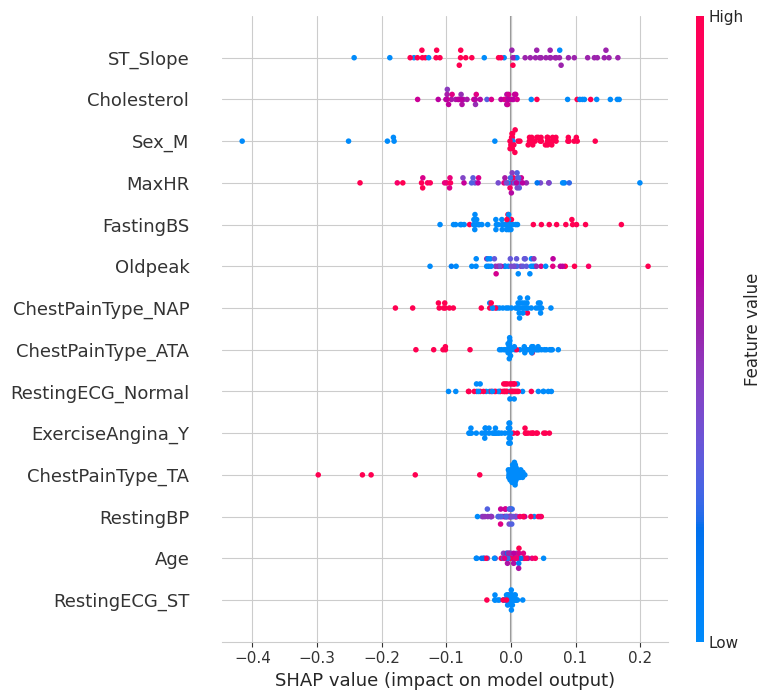

In [36]:
import shap
import numpy as np

# Proper feature names (14)
feature_names = df_encoded.drop(columns=['HeartDisease']).columns.tolist()

# Initialize SHAP
shap.initjs()

# Create SHAP DeepExplainer
explainer = shap.DeepExplainer(model, X_train_cnn[:100])  # Subset for efficiency

# Compute SHAP values for test set
shap_values = explainer.shap_values(X_test_cnn[:50])  # 50 samples

# Reshape SHAP values
shap_values_reshaped = np.array(shap_values).reshape((50, X_test_scaled.shape[1]))

# Confirm shape matches
assert shap_values_reshaped.shape == X_test_scaled[:50].shape, "SHAP and input shapes mismatch!"

# SHAP Summary Plot with correct feature names
shap.summary_plot(shap_values_reshaped, X_test_scaled[:50], feature_names=feature_names)

# Force plot for one sample
expected_value = explainer.expected_value[0].numpy() if hasattr(explainer.expected_value[0], 'numpy') else explainer.expected_value[0]
shap_values_numpy = shap_values_reshaped[0].numpy() if hasattr(shap_values_reshaped[0], 'numpy') else shap_values_reshaped[0]
X_test_scaled_numpy = X_test_scaled[0].numpy() if hasattr(X_test_scaled[0], 'numpy') else X_test_scaled[0]

shap.force_plot(expected_value, shap_values_numpy, X_test_scaled_numpy, feature_names=feature_names)


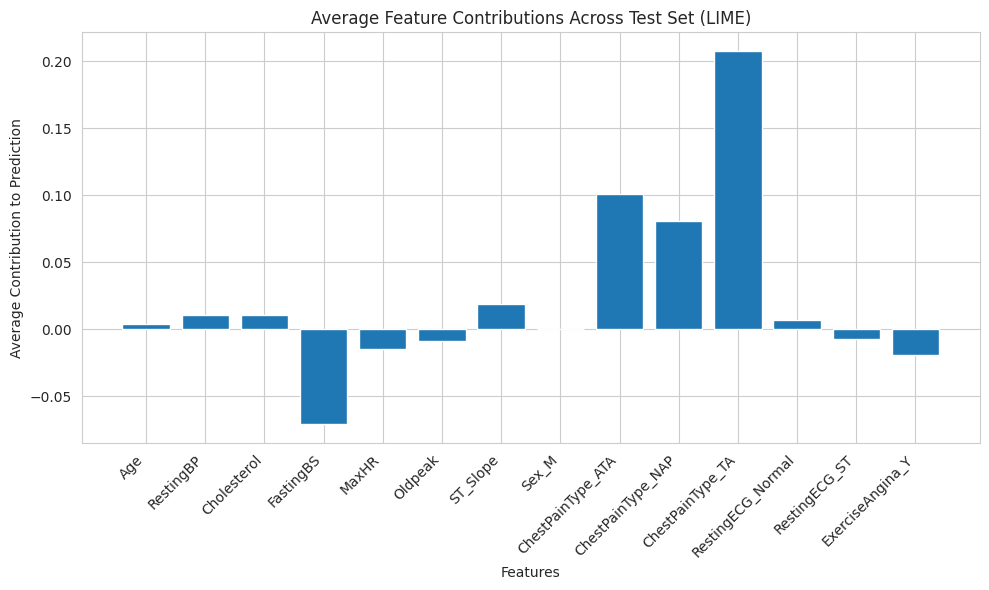

In [38]:
import lime
import lime.lime_tabular
import numpy as np
import matplotlib.pyplot as plt

# Real feature names from DataFrame
feature_names = df_encoded.drop(columns=['HeartDisease']).columns.tolist()

# LIME Explainer setup with real feature names
explainer = lime.lime_tabular.LimeTabularExplainer(
    X_train_scaled,
    feature_names=feature_names,
    class_names=['Non-Fraud', 'Fraud'],
    mode='classification'
)

# Prediction function for CNN
def predict_fn_cnn(x):
    x_reshaped = np.expand_dims(x, axis=2)
    prob = model.predict(x_reshaped, verbose=0)
    return np.hstack([1 - prob, prob])

# Analyze all test samples with LIME
feature_contributions = []
for idx in range(X_test_scaled.shape[0]):
    sample_instance = X_test_scaled[idx]
    lime_exp = explainer.explain_instance(
        sample_instance,
        predict_fn_cnn,
        num_features=10
    )
    contributions = dict(lime_exp.as_list())
    feature_contributions.append(contributions)

# Aggregate feature contributions
n_features = X_test_scaled.shape[1]
avg_contributions = np.zeros(n_features)
contribution_counts = np.zeros(n_features)

# Parse feature names (now using actual column names)
for contrib_dict in feature_contributions:
    for feature, value in contrib_dict.items():
        for i, real_name in enumerate(feature_names):
            if real_name in feature:  # Match real feature name in LIME string
                avg_contributions[i] += value
                contribution_counts[i] += 1
                break

# Compute the average contributions
avg_contributions = np.divide(avg_contributions, contribution_counts, where=contribution_counts != 0)

# Plotting the average feature contributions
plt.figure(figsize=(10, 6))
plt.bar(feature_names, avg_contributions)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Features')
plt.ylabel('Average Contribution to Prediction')
plt.title('Average Feature Contributions Across Test Set (LIME)')
plt.tight_layout()
plt.show()


In [39]:
print("Number of test samples used in LIME:", X_test_scaled.shape[0])

Number of test samples used in LIME: 184
